In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import scanpy as sc
import scipy as sp

import sys
import os
sys.path.append(os.path.abspath("./utility_functions"))

import rz_functions as rz
import rz_utility_spring as srz

from time import time
#from seaborn import kdeplot, distplot, pairplot
#from seaborn import Pairgrid

/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


python version: 3.6.10


In [2]:
cell_subset_dict = {'B cells' : 'B cells',
                     'Basophils' : 'Basophils',
                     'DC1' : 'MoMacDC',
                     'DC2' : 'MoMacDC',
                     'DC3' : 'MoMacDC',
                     'Mac1' : 'MoMacDC',
                     'Mac2' : 'MoMacDC',
                     'Mac3' : 'MoMacDC',
                     'Mac4' : 'MoMacDC',
                     'Mono1' : 'MoMacDC',
                     'Mono2' : 'MoMacDC',
                     'Mono3' : 'MoMacDC',
                     'MonoDC' : 'MoMacDC',
                     'N1' : 'Neutrophils',
                     'N2' : 'Neutrophils',
                     'N3' : 'Neutrophils',
                     'N4' : 'Neutrophils',
                     'N5' : 'Neutrophils',
                     'N6' : 'Neutrophils',
                     'N6' : 'Neutrophils',
                     'NK cells' : 'NK cells',
                     'T1' : 'T cells',
                     'T2' : 'T cells',
                     'T3' : 'T cells',
                     'pDC' : 'pDC'}

cell_subset_cmap =  {'B cells': '#4666B0',
                     'Basophils': '#4c2e4d',
                     'DC1': '#ff0000',
                     'DC2': '#ff9900',
                     'DC3': '#990000',
                     'Mac1': '#FF9ACC',
                     'Mac2': '#66ffff',
                     'Mac3': '#9966ff',
                     'Mac4': '#33cccc',
                     'Mono1': '#e1e74b',
                     'Mono2': '#6d700f',
                     'Mono3': '#0099ff',
                     'MonoDC': '#00cc00',
                     'N1': '#0a5e75',
                     'N2': '#66ffcc',
                     'N3': '#008055',
                     'N4': '#12a9d3',
                     'N5': '#666699',
                     'N6': '#EE2C7C',
                     'NK cells': '#1F6935',
                     'Plasma_cells': '#c0ff36',
                     'pDC': '#a094ff',
                     'T1' : '#FFD900',
                     'T2' : '#BA0899',
                     'T3' : '#CC263C',
                     'T_CD4': '#0098ff',
                     'T_CD8': '#18ffdd',
                     'T_Calca_?': '#00bcff',
                     'T_Cd163l1_?': '#f50b00',
                     'T_doublet_B': '#6cff89',
                     'T_doublet_Neutro': '#32ffc3',
                     'T_reg': '#0000f5'}

In [3]:
adata = sc.read_h5ad('backups/tox_marie_all_cells_umap35358x22631_backup_200407_11h05.h5ad')
adata

AnnData object with n_obs × n_vars = 35358 × 2058 
    obs: 'barcode', 'group', 'library_name', 'marker', 'max_mt', 'min_tot', 'mito_frac', 'n_counts', 'n_genes', 'pool', 'tissue', 'treatment', 'louvain'
    uns: 'spring_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
adata_raw = sc.read_h5ad('backups/tox_marie_filtered_merged_35358x22631_backup_200404_17h27.h5ad')

adata_raw[:,['Il12b']].X = adata_raw[:,['Il12b', 'eYFP']].X.sum(1)
adata_raw[:,['eYFP']].X = 0


sc.pp.normalize_total(adata_raw, target_sum=1e4)

/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [5]:
#loglikelihoods = sp.sparse.load_npz('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz')
logls = np.load('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz', allow_pickle=True)

mostlikely_subset = pd.DataFrame(logls['data'], index=logls['index'], columns=logls['columns']).idxmax()
mostlikely_subset = pd.Series(mostlikely_subset, dtype='category')
mostlikely_subset.index = adata.obs.index

mostlikely_celltype = mostlikely_subset.map(cell_subset_dict).astype('category')

In [6]:
adata.obs['cell_type'] = mostlikely_celltype
adata.obs['minor_subset'] = mostlikely_subset

adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
#adata_raw.varm = adata.varm

Trying to set attribute `.uns` of view, copying.


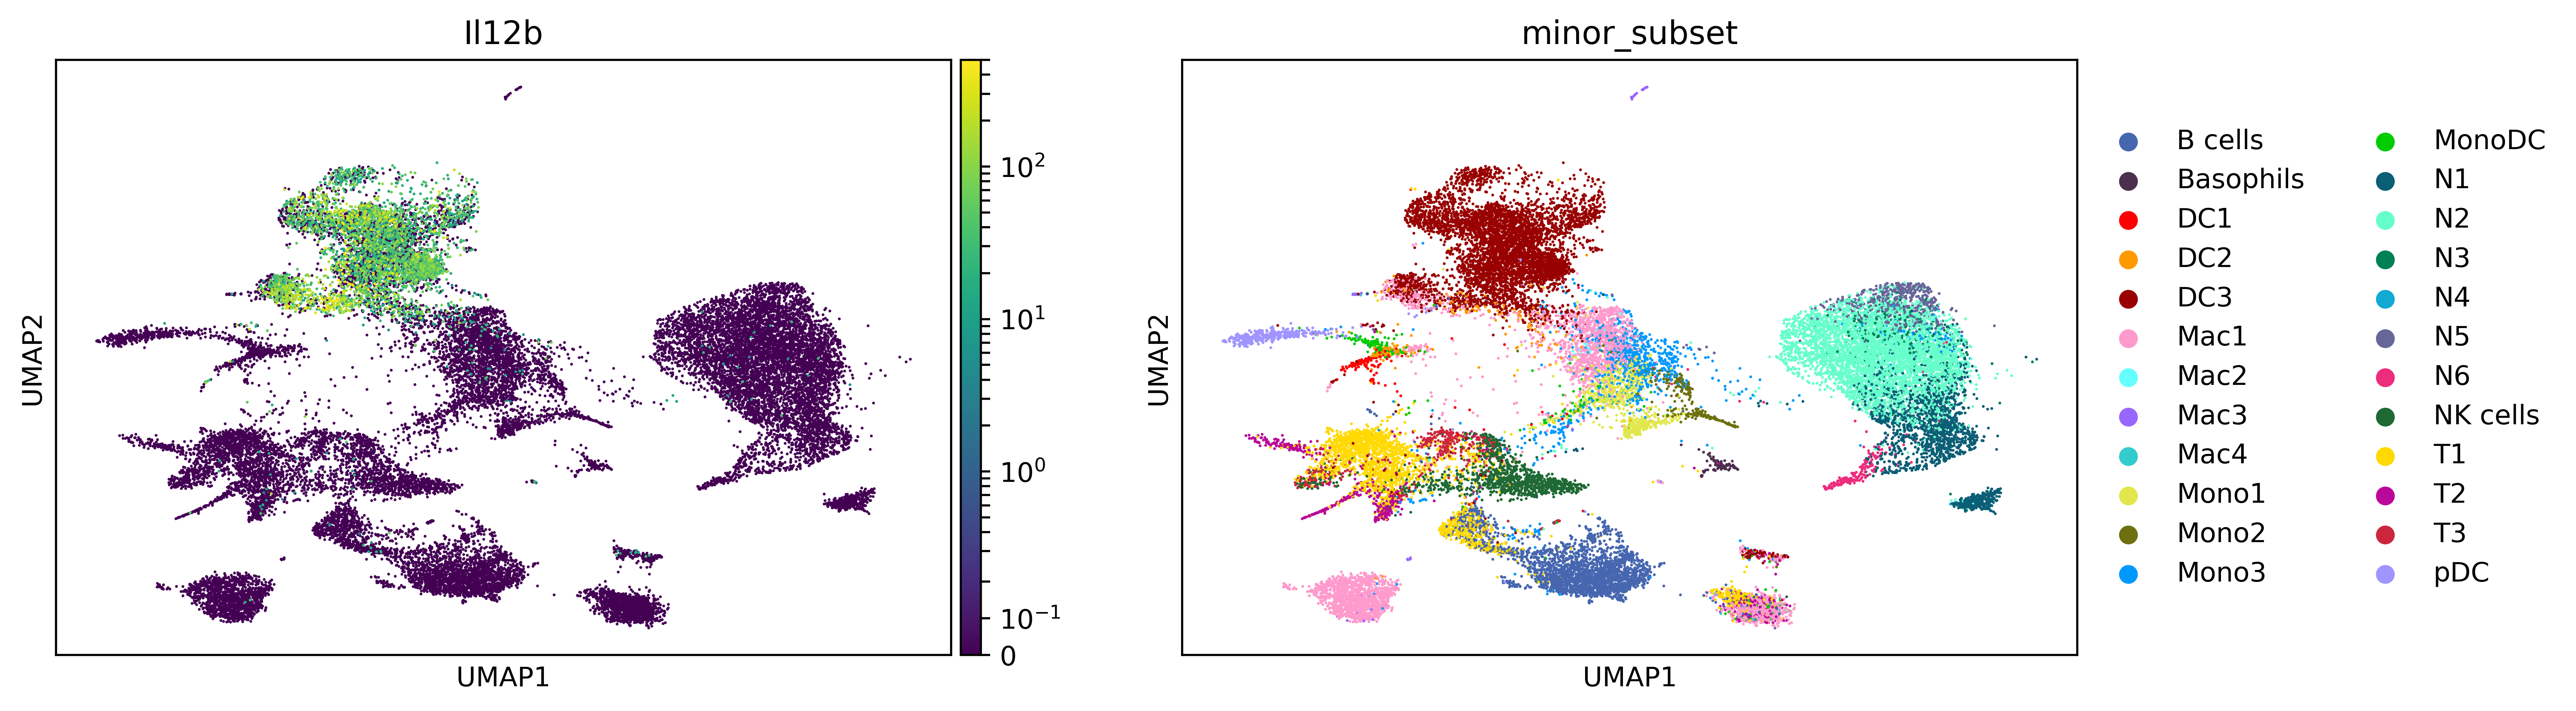

In [303]:
#fig, axes = plt.subplots(1,1, figsize=(5,5), dpi=300)
#fig.suptitle('Tumor', fontsize=32)


#sc.pl.umap(adata[(adata.obs['tissue']=='Liver') & (adata.obs['treatment']=='Trx')], color=['louvain'], norm=matplotlib.colors.PowerNorm(0.2), ax=axes, vmax=20)
#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['Il12b'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis', ax=axes, vmax=20)
#sc.pl.umap(adata[adata.obs['tissue']=='Liver'], color=['C1qa', 'Apoe', 'Marco', 'Axl', 'Flt3', 'Tbc1d4', 'Ccr7'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis')



#umap_pre_yfp = sc.pl.umap(adata_raw[adata_raw.obs['tissue']=='Liver'], color=['Il12b', 'minor_subset'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis', vmax=69)

umap_pre_yfp = sc.pl.umap(adata_raw[adata.obs['tissue']=='Liver'], color=['Il12b', 'minor_subset'], 
                           palette=adata_raw.obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(),
                           norm=matplotlib.colors.SymLogNorm(linthresh=0.25, base=2), cmap='viridis', vmax=500, return_fig=True)

umap_pre_yfp.set_dpi(500)
#umap_post_yfp = sc.pl.umap(adata[adata.obs['tissue']=='Liver'], color=['Il12b', 'minor_subset'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis')



#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['minor_subset'], norm=matplotlib.colors.PowerNorm(0.2), cmap='winter', ax=axes[1,0])
#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['Il12b'], norm=matplotlib.colors.PowerNorm(0.2), cmap='winter', ax=axes[1,1])
#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['marker'], norm=matplotlib.colors.PowerNorm(0.2), cmap='winter', ax=axes[1,2])

#sc.pl.umap(adata[adata.obs['tissue']=='Tumor'], color=['minor_subset', 'Il12b','marker'], norm=matplotlib.colors.PowerNorm(0.2), cmap='winter')

#plt.tight_layout()

In [238]:
#plt.hist(adata[:,'Il12b'].X.todense().A1, bins=100)
adata_raw[:,'Il12b'].X.max()

766.12897

In [36]:
mostlikely_celltype = .map(major_subset_dict)

48-pool1             MoMacDC
98-pool1         Neutrophils
237-pool1           NK cells
246-pool1            MoMacDC
342-pool1            T cells
                    ...     
1471700-pool5        MoMacDC
1471869-pool5        MoMacDC
1472549-pool5        MoMacDC
1472953-pool5        MoMacDC
1472972-pool5        MoMacDC
Length: 35358, dtype: object

In [68]:
adata[0,'Il12b'].X.todense()

matrix([[-0.26418054]], dtype=float32)

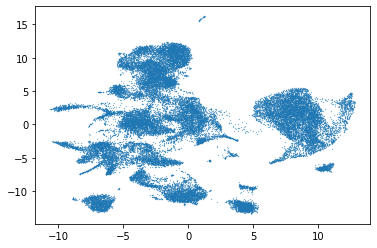

In [42]:
plt.scatter(*adata.obsm['X_umap'].T, s=0.05)

In [78]:
example_df = adata.obs.join(pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata.obs.index)) 

In [87]:
#adata.obs.join(pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata.obs.index)).plot.scatter('UMAP1', 'UMAP2', 
#                                                                                                                   s = 0.01,
#                                                                                                                   c = 'minor_subset')

pairplot(data = example_df, x_vars = ['UMAP1'], y_vars=['UMAP2'], hue_kws={'s':2})

TypeError: pairplot() got an unexpected keyword argument 'hue_kws'

Trying to set attribute `.obs` of view, copying.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'minor_subset' as categorical


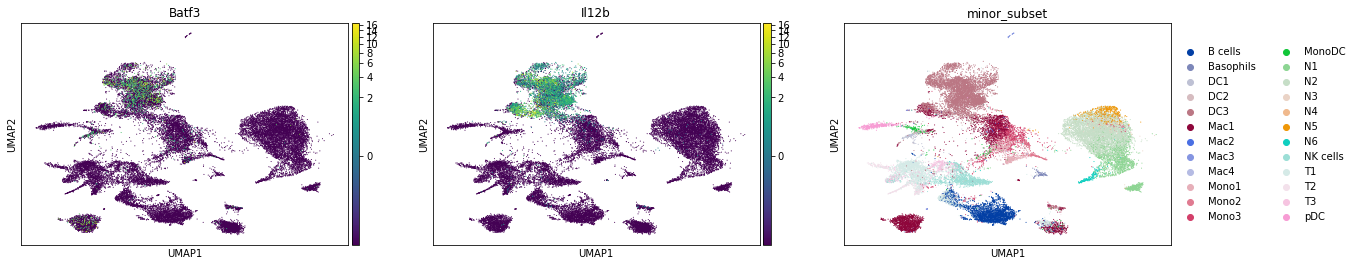

In [96]:
umap_plot = sc.pl.umap(adata[adata.obs['tissue']=='Liver'], color=['Batf3', 'Il12b', 'minor_subset'], norm=matplotlib.colors.PowerNorm(0.2), cmap='viridis', return_fig=True)
#plt.gcf()


In [100]:
umap_plot.set_dpi(300)

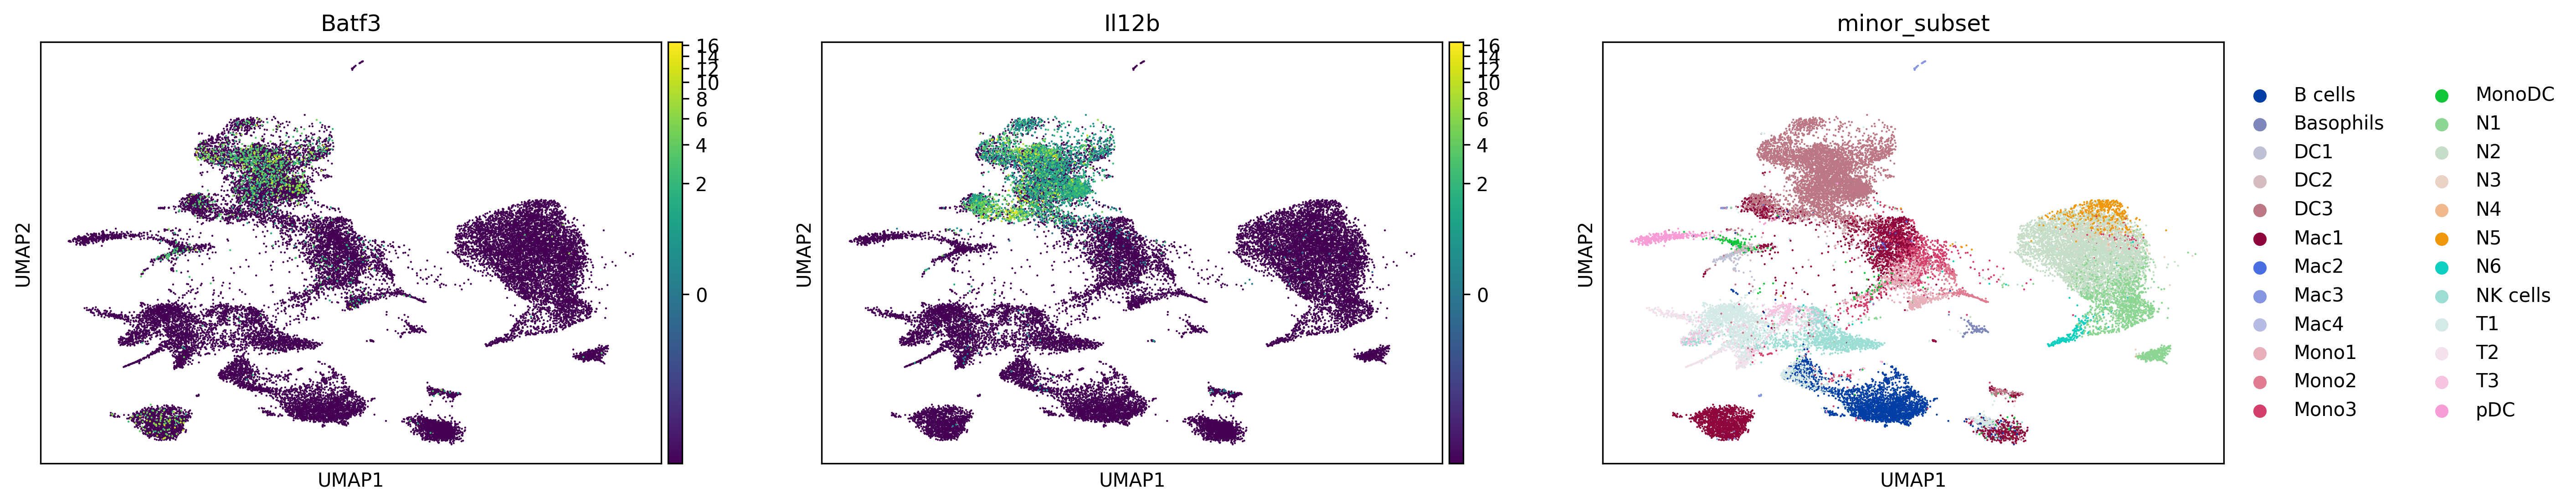

In [101]:
umap_plot

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


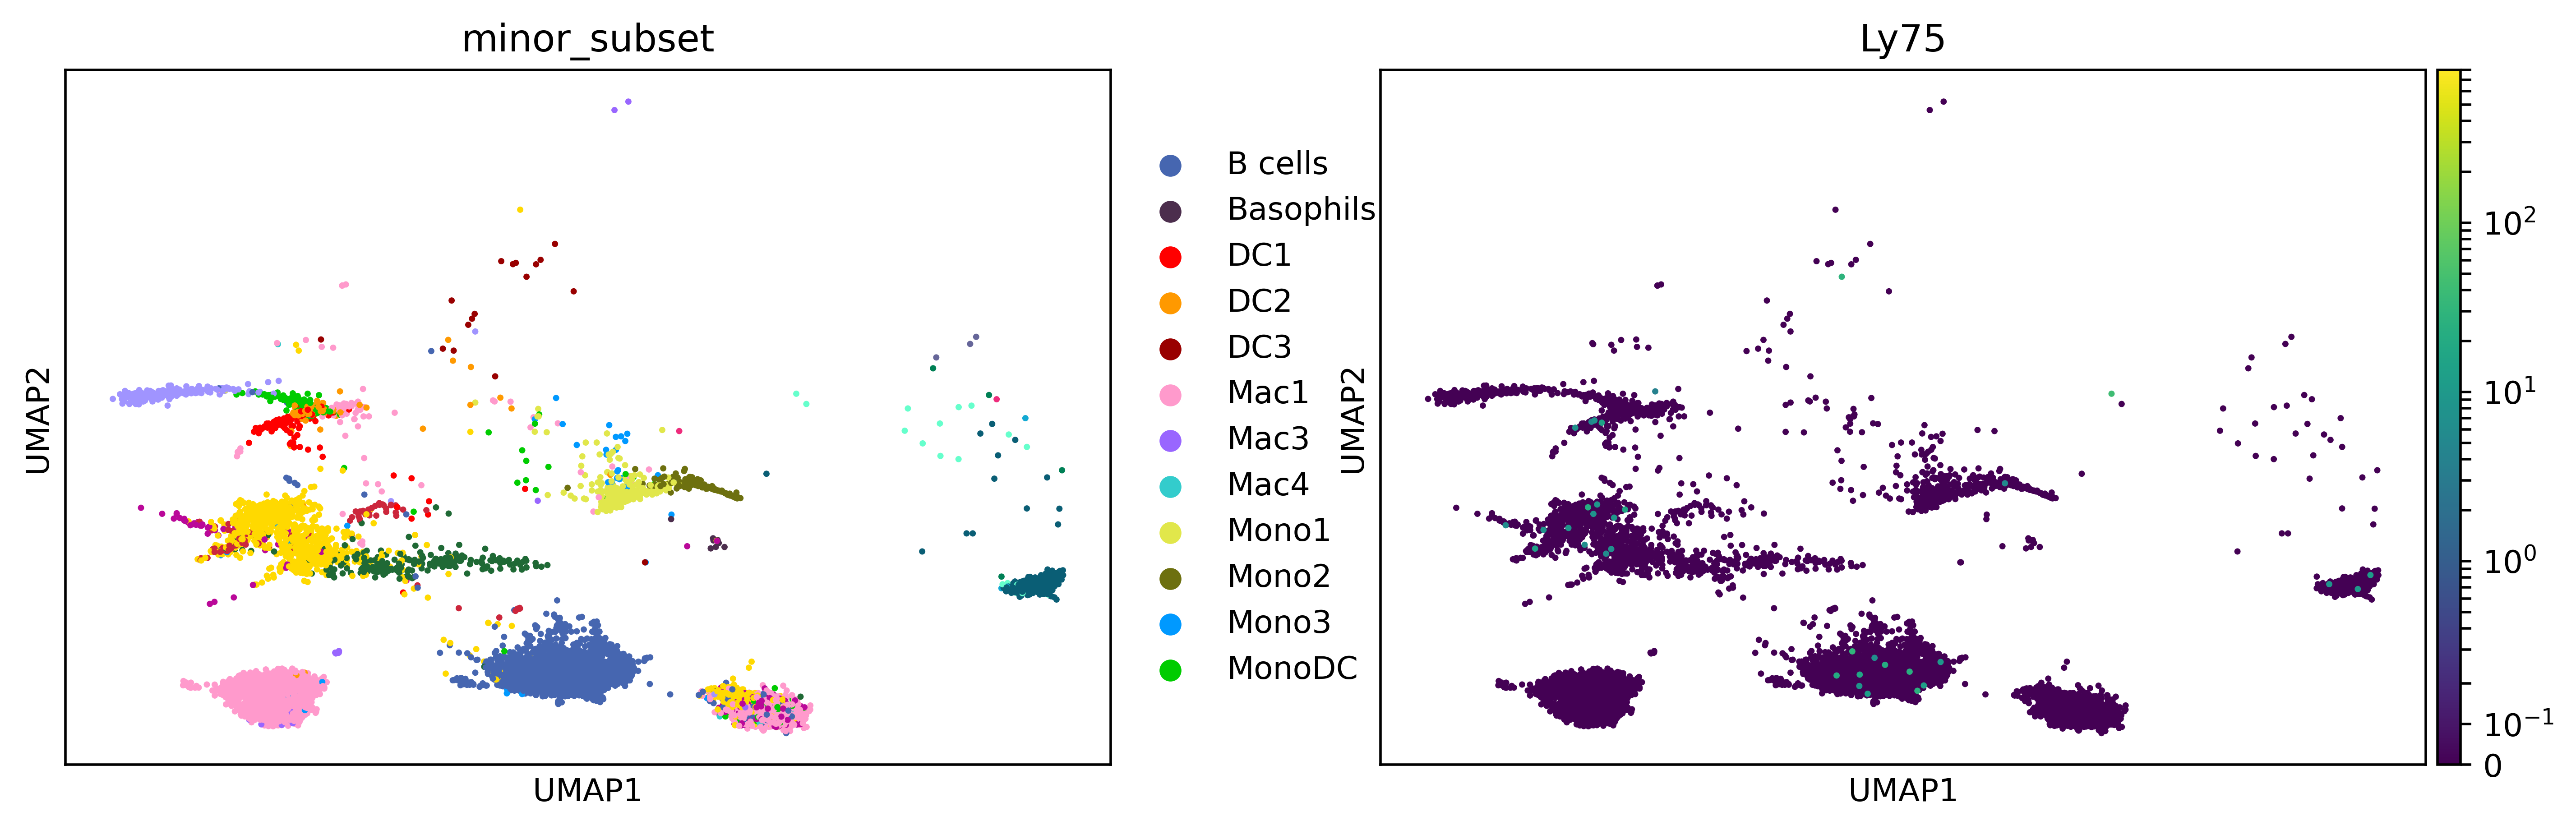

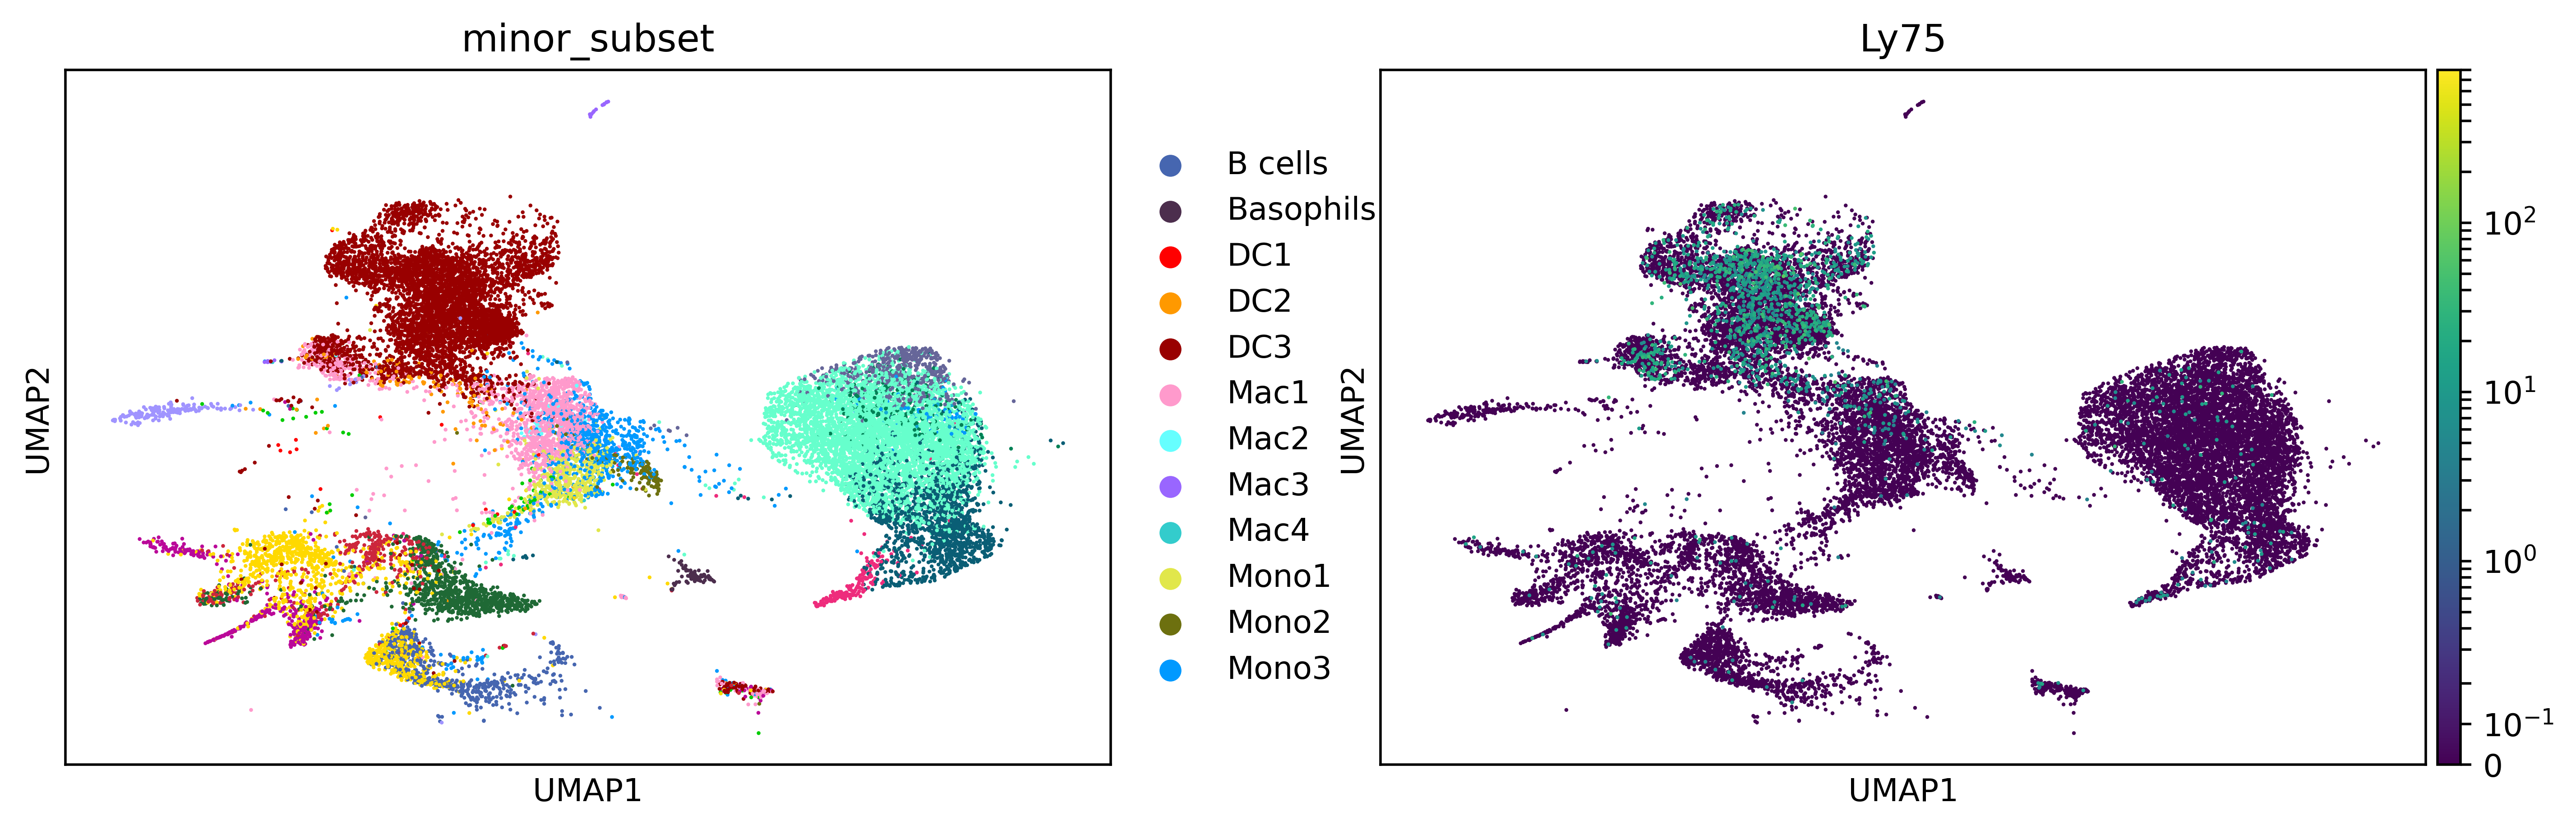

In [30]:
umap_nt = sc.pl.umap(adata_raw[(adata_raw.obs['tissue']=='Liver')&(adata_raw.obs['treatment']=='NT')], vmax=800, norm = matplotlib.colors.SymLogNorm(linthresh=0.25, base=2),
                     color=['minor_subset', 'Ly75'], 
                     palette=adata_raw[(adata_raw.obs['tissue']=='Liver')&(adata_raw.obs['treatment']=='NT')].obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(), return_fig=True)
umap_nt.set_dpi(500)


# umap_nt = sc.pl.umap(adata_raw[(adata_raw.obs['tissue']=='Tumor')&(adata_raw.obs['treatment']=='NT')], vmax=800, norm = matplotlib.colors.SymLogNorm(linthresh=0.25, base=2),
#                      color=['minor_subset', 'Adgre1', 'Itgam', 'Batf3', 'Clec4f', 'Spic', 'Irf7', 'C1qa', 'Apoe', 'Marco', 'Axl', 'Flt3', 'Tbc1d4', 'Ccr7'], 
#                      palette=adata_raw.obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(), return_fig=True)
#umap_nt.set_dpi(500)

umap_trx = sc.pl.umap(adata_raw[(adata_raw.obs['tissue']=='Liver')&(adata_raw.obs['treatment']=='Trx')], vmax=800, norm = matplotlib.colors.SymLogNorm(linthresh=0.25, base=2),
                    color=['minor_subset', 'Ly75'], 
                    palette= adata_raw[(adata_raw.obs['tissue']=='Liver')&(adata_raw.obs['treatment']=='Trx')].obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist(), return_fig=True)
umap_trx.set_dpi(500)

In [11]:
adata_raw.obs['minor_subset'].cat.categories.map(cell_subset_cmap).tolist()

['#4666B0',
 '#4c2e4d',
 '#ff0000',
 '#ff9900',
 '#990000',
 '#FF9ACC',
 '#66ffff',
 '#9966ff',
 '#33cccc',
 '#e1e74b',
 '#6d700f',
 '#0099ff',
 '#00cc00',
 '#0a5e75',
 '#66ffcc',
 '#008055',
 '#12a9d3',
 '#666699',
 '#EE2C7C',
 '#1F6935',
 '#FFD900',
 '#BA0899',
 '#CC263C',
 '#a094ff']

In [26]:
[x in adata_raw.var_names for x in ['Adgre1', 'Itgam', 'Batf3', 'Clec4f', 'Spic', 'Irf7', 'C1qa', 'Apoe', 'Marco', 'Axl', 'Flt3', 'Tbc1d4', 'Ccr7', 'Clec9a']]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [315]:
umap_trx.get_axes()[0]